In [120]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
import seaborn as sns
import ast

In [178]:
# import os

# folder = "/home/trishalaswain/Downloads/common-server/tar-extractions/MarCHS-New26/"
# # folder = "/home/trishalaswain/Downloads/Feb_01_to_28_tsv (1)/"
# dfs = []
# for filename in os.listdir(folder):
#     if filename.startswith('CHS-9954'):
#         # if filename.endswith("28.tsv") or filename.endswith("31.tsv"):
#         #     print(os.path.join(folder, filename))
#         #     dfs.append(pd.read_table(os.path.join(folder, filename),index_col=False))
#         if filename.endswith("15.tsv"):
#             print(os.path.join(folder, filename))
#             dfs.append(pd.read_table(os.path.join(folder, filename),index_col=False))

# df = pd.concat(dfs)
df = pd.read_table('/home/trishalaswain/Downloads/common-server/tar-extractions/MarCHS-New26/CHS-9954-CHS Affinity Physician Services - 9954-2023-03-01-2023-04-01.tsv',sep='\t', index_col=False)

In [179]:
df

,id,physicianId,serviceDate,processingDate,admissionDate,userId,processId,lastCodingDate,month,visitType,...,EANDM_Rejected_Count,EANDM_Added_Count,HCPCS_Final,HCPCS_Accepted,HCPCS_Rejected,HCPCS_Added,HCPCS_Suggested,HCPCS_Accepted_Count,HCPCS_Rejected_Count,HCPCS_Added_Count
0,5439711,18828,2023-02-27 09:30:00.0,2023-02-27 17:06:15.0,2023-02-27 09:50:00.0,4985,1,2023-03-01 06:41:35.0,2023-03,*New Patient 15,...,0,0,[],[],[],[],[],0,0,0
1,5439351,18828,2023-02-27 10:45:00.0,2023-02-27 16:40:45.0,2023-02-27 10:41:00.0,4985,1,2023-03-01 06:42:51.0,2023-03,RECHECK,...,1,1,[],[],[],[],[],0,0,0
2,5439303,18828,2023-02-27 10:15:00.0,2023-02-27 16:37:16.0,2023-02-27 10:25:00.0,4985,1,2023-03-01 06:44:03.0,2023-03,RECHECK,...,0,0,[],[],[],[],[],0,0,0
3,5439161,18828,2023-02-27 09:00:00.0,2023-02-27 16:29:15.0,2023-02-27 09:14:00.0,4985,1,2023-03-01 06:49:31.0,2023-03,New Complaint - Est Pt 15,...,1,1,[J1100],[J1100],[J3490],[],"[J1100, J3490]",1,1,0
4,5438768,18828,2023-02-27 09:45:00.0,2023-02-27 16:07:00.0,2023-02-27 09:34:00.0,4985,1,2023-03-01 06:56:46.0,2023-03,RECHECK,...,1,1,[J7328],[J7328],[],[],[J7328],1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,5886253,27822,2023-03-23 09:15:00.0,2023-03-23 11:05:00.0,2023-03-23 09:15:00.0,5037,1,2023-03-24 16:16:06.0,2023-03,*New Patient 15,...,1,1,[],[],[],[],[],0,0,0
505,5885334,27822,2023-03-23 08:00:00.0,2023-03-23 10:22:28.0,2023-03-23 08:00:00.0,5037,1,2023-03-24 16:17:06.0,2023-03,*New Patient 15,...,1,1,[],[],[],[],[],0,0,0
506,5883666,27822,2023-03-23 08:30:00.0,2023-03-23 08:23:52.0,2023-03-23 08:30:00.0,5037,1,2023-03-24 16:17:31.0,2023-03,*Post Op 15,...,0,0,[],[],[],[],[],0,0,0
507,5886405,27822,2023-03-23 08:15:00.0,2023-03-23 11:11:56.0,2023-03-23 08:49:00.0,5037,1,2023-03-24 16:19:27.0,2023-03,*New Patient 15,...,0,0,[],[],[],[],[],0,0,0


In [180]:
df['EANDM_Suggested_code']=None

In [181]:
def emsugg_filtered():
    df['EANDM_Suggested_code'] = None
    for ind, row in df.iterrows():
        # print(type(row['EANDM_Accepted']))
        if len(row["EANDM_Accepted"]) == 2:
            accepted = ""
        else:
            accepted = row["EANDM_Accepted"][1:-1]

        if len(row["EANDM_Rejected"]) == 2:
            rejected = ""
        else:
            rejected = row["EANDM_Rejected"][1:-1]
            
        if len(accepted) == 0:
            li = []
        else:
            li = ast.literal_eval(accepted)
            li = [li]

        if len(rejected) == 0:
            li2 = []
        else:
            li2 = ast.literal_eval(rejected)
            li2 = [li2]

        li3 = []
        for item in li:
            li3.append(item)
        for item2 in li2:
            li3.append(item2)
            
        li3 = []
        # print(li3)
        for item in li:
            if type(item) is tuple:
                for x in item:
                    li3.append(x)
                    
            else:
                li3.append(item)

        for item2 in li2:
            if type(item2) is tuple:
                for x in item2:
                    li3.append(x)
            else: 
                li3.append(item2)
        # print(li3)

        df.at[ind,'EANDM_Suggested_code'] = li3

In [182]:
df.to_excel('/home/trishalaswain/Downloads/excel.xlsx')

In [183]:
emsugg_filtered()

In [184]:
df.EANDM_Suggested_code.value_counts()

[]                111
[99213]           104
[99203]            74
[99204]            41
[99214]            36
[99203, 99213]     28
[99214, 99204]     26
[99212]            21
[99202, 99212]     20
[99213, 99203]     19
[99202]            16
[99212, 99202]      8
[99204, 99214]      4
[99205]             1
Name: EANDM_Suggested_code, dtype: int64

In [1]:
def emfinal_filtered():
    df['EANDM_Final_code'] = None
    for ind, row in df.iterrows():
        print(row["EANDM_Accepted"])
        print(row["EANDM_Added"])
        if len(row["EANDM_Accepted"]) == 2:
            accepted = ""
        else:
            accepted = row["EANDM_Accepted"][1:-1]
            
        if len(row["EANDM_Added"]) == 2:
            added = ""
        else:
            added = row["EANDM_Added"][1:-1]

        if len(accepted) == 0:
            li = []
        else:
            li = ast.literal_eval(accepted)
            li = [li]

        if len(added) == 0:
            li2 = []
        else:
            li2 = ast.literal_eval(added)
            li2 = [li2]

        li3 = []
        for item in li:
            if type(item) is tuple:
                for x in item:
                    li3.append(x)
            else:
                li3.append(item)

        for item2 in li2:
            if type(item2) is tuple:
                for x in item2:
                    li3.append(x)
            else: 
                li3.append(item2)
        # li3.remove(
       
        df.at[ind,'EANDM_Final_code'] = li3

In [2]:
emfinal_filtered(df)

NameError: name 'df' is not defined

In [187]:
df.EANDM_Final_code

0      [99203]
1      [99213]
2      [99214]
3      [99213]
4      [99212]
        ...   
504    [99203]
505    [99203]
506         []
507    [99204]
508    [99213]
Name: EANDM_Final_code, Length: 509, dtype: object

In [188]:
# type(df.EANDM_Final_code.values)

In [189]:
df['new_final']=df.EANDM_Final_code.apply(lambda x: ','.join([str(i) for i in x]))

In [190]:
df['new_suggested']=df.EANDM_Suggested_code.apply(lambda x: ','.join([str(i) for i in x]))

In [191]:
from sklearn.preprocessing import MultiLabelBinarizer
actual = MultiLabelBinarizer().fit_transform(df.new_final.values)
predicted = MultiLabelBinarizer().fit_transform(df.new_suggested.values)

In [192]:
df.new_final

0      99203
1      99213
2      99214
3      99213
4      99212
       ...  
504    99203
505    99203
506         
507    99204
508    99213
Name: new_final, Length: 509, dtype: object

In [193]:
actual.size

3054

In [194]:
df.new_suggested

0            99203
1            99214
2            99214
3            99214
4            99214
          ...     
504          99202
505          99202
506               
507          99204
508    99213,99203
Name: new_suggested, Length: 509, dtype: object

In [195]:
predicted.size

4072

In [196]:
len(df.new_suggested.unique().tolist())

14

In [197]:
len(df.new_final.unique().tolist())

8

In [198]:
print(df.new_suggested.unique().tolist())

['99203', '99214', '99213', '99204', '', '99212', '99202', '99203,99213', '99202,99212', '99214,99204', '99204,99214', '99213,99203', '99212,99202', '99205']


In [199]:
# ax= plt.subplot()
# sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax);
# ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
# ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(df.new_suggested.unique().tolist());
# ax.yaxis.set_ticklabels(df.new_suggested.unique().tolist());

In [200]:
df.new_final.unique().tolist()

['99203', '99213', '99214', '99212', '99204', '', '99202', '99442']

In [201]:
df.new_suggested.unique().tolist()

['99203',
 '99214',
 '99213',
 '99204',
 '',
 '99212',
 '99202',
 '99203,99213',
 '99202,99212',
 '99214,99204',
 '99204,99214',
 '99213,99203',
 '99212,99202',
 '99205']

In [202]:
# ax.xaxis.set_ticklabels(df.new_suggested);

In [203]:
confusion_matrix = metrics.confusion_matrix(df.new_final, df.new_suggested, labels=df.new_suggested.unique().tolist())

In [204]:
# confusion_matrix_2 = metrics.confusion_matrix(actual.argmax(axis=1), predicted.argmax(axis=1))

In [205]:
 # predicted.argmax(axis=1)

In [206]:
# confusion_matrix_2

In [207]:
confusion_matrix

array([[ 63,   0,   1,   4,   0,   0,   6,  11,   0,   1,   0,   0,   0,
          0],
       [  0,  25,   3,   0,   0,   0,   0,   4,   1,  10,   0,   0,   0,
          0],
       [  0,   8,  70,   1,   1,   0,   0,   0,   7,  11,   0,  19,   0,
          0],
       [  7,   0,   1,  36,   0,   1,   6,   6,   2,   0,   4,   0,   0,
          1],
       [  0,   0,  17,   0, 110,   7,   1,   6,   8,   2,   0,   0,   0,
          0],
       [  2,   3,  12,   0,   0,  13,   0,   1,   0,   1,   0,   0,   8,
          0],
       [  2,   0,   0,   0,   0,   0,   3,   0,   2,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

In [208]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels = df.new_suggested.unique().tolist())

In [209]:
 confusion_matrix

array([[ 63,   0,   1,   4,   0,   0,   6,  11,   0,   1,   0,   0,   0,
          0],
       [  0,  25,   3,   0,   0,   0,   0,   4,   1,  10,   0,   0,   0,
          0],
       [  0,   8,  70,   1,   1,   0,   0,   0,   7,  11,   0,  19,   0,
          0],
       [  7,   0,   1,  36,   0,   1,   6,   6,   2,   0,   4,   0,   0,
          1],
       [  0,   0,  17,   0, 110,   7,   1,   6,   8,   2,   0,   0,   0,
          0],
       [  2,   3,  12,   0,   0,  13,   0,   1,   0,   1,   0,   0,   8,
          0],
       [  2,   0,   0,   0,   0,   0,   3,   0,   2,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

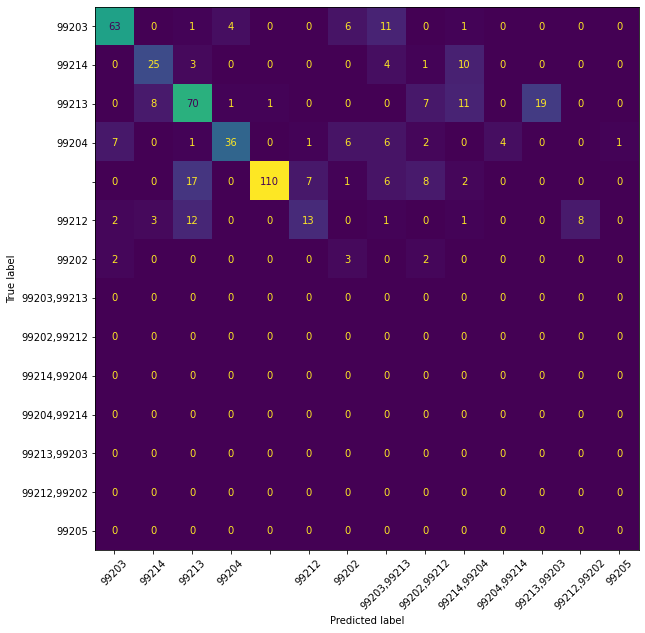

In [210]:
# cm_display.plot()
fig, ax = plt.subplots(figsize=(10,10))

cm_display.plot(ax=ax, colorbar=False, xticks_rotation=45)
plt.show()

In [211]:
# pd.crosstab(df.new_final, df.new_suggested,margins = True, margins_name='Total')
pd.crosstab(df.new_final, df.new_suggested,margins = True, margins_name='Total')

new_suggested,,99202,"99202,99212",99203,"99203,99213",99204,"99204,99214",99205,99212,"99212,99202",99213,"99213,99203",99214,"99214,99204",Total
new_final,,,,,,,,,,,,,,,
,110,1,8,0,6,0,0,0,7,0,17,0,0,2,151
99202,0,3,2,2,0,0,0,0,0,0,0,0,0,0,7
99203,0,6,0,63,11,4,0,0,0,0,1,0,0,1,86
99204,0,6,2,7,6,36,4,1,1,0,1,0,0,0,64
99212,0,0,0,2,1,0,0,0,13,8,12,0,3,1,40
99213,1,0,7,0,0,1,0,0,0,0,70,19,8,11,117
99214,0,0,1,0,4,0,0,0,0,0,3,0,25,10,43
99442,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
Total,111,16,20,74,28,41,4,1,21,8,104,19,36,26,509


In [212]:
# FINDINGS:
# suggested 202,212 & final 203 -- 19 cases
# Diagnosis - 3	Data - 1	Risk - 0	Final - 99212 in all cases and no data/risk found from ui as well
# suggested 99212 & final 99213 -- 27 cases
# Diagnosis Level - 3
# Data Level - 0
# Risk Level - 4 giving 99214 now

In [213]:
type(df.EANDM_Final_code[1])

list

In [214]:
type(actual)

numpy.ndarray

In [215]:
actual

array([[1, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 1],
       ...,
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 1, 1, 1, 0, 1]])

In [216]:
df

,id,physicianId,serviceDate,processingDate,admissionDate,userId,processId,lastCodingDate,month,visitType,...,HCPCS_Rejected,HCPCS_Added,HCPCS_Suggested,HCPCS_Accepted_Count,HCPCS_Rejected_Count,HCPCS_Added_Count,EANDM_Suggested_code,EANDM_Final_code,new_final,new_suggested
0,5439711,18828,2023-02-27 09:30:00.0,2023-02-27 17:06:15.0,2023-02-27 09:50:00.0,4985,1,2023-03-01 06:41:35.0,2023-03,*New Patient 15,...,[],[],[],0,0,0,[99203],[99203],99203,99203
1,5439351,18828,2023-02-27 10:45:00.0,2023-02-27 16:40:45.0,2023-02-27 10:41:00.0,4985,1,2023-03-01 06:42:51.0,2023-03,RECHECK,...,[],[],[],0,0,0,[99214],[99213],99213,99214
2,5439303,18828,2023-02-27 10:15:00.0,2023-02-27 16:37:16.0,2023-02-27 10:25:00.0,4985,1,2023-03-01 06:44:03.0,2023-03,RECHECK,...,[],[],[],0,0,0,[99214],[99214],99214,99214
3,5439161,18828,2023-02-27 09:00:00.0,2023-02-27 16:29:15.0,2023-02-27 09:14:00.0,4985,1,2023-03-01 06:49:31.0,2023-03,New Complaint - Est Pt 15,...,[J3490],[],"[J1100, J3490]",1,1,0,[99214],[99213],99213,99214
4,5438768,18828,2023-02-27 09:45:00.0,2023-02-27 16:07:00.0,2023-02-27 09:34:00.0,4985,1,2023-03-01 06:56:46.0,2023-03,RECHECK,...,[],[],[J7328],1,0,0,[99214],[99212],99212,99214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,5886253,27822,2023-03-23 09:15:00.0,2023-03-23 11:05:00.0,2023-03-23 09:15:00.0,5037,1,2023-03-24 16:16:06.0,2023-03,*New Patient 15,...,[],[],[],0,0,0,[99202],[99203],99203,99202
505,5885334,27822,2023-03-23 08:00:00.0,2023-03-23 10:22:28.0,2023-03-23 08:00:00.0,5037,1,2023-03-24 16:17:06.0,2023-03,*New Patient 15,...,[],[],[],0,0,0,[99202],[99203],99203,99202
506,5883666,27822,2023-03-23 08:30:00.0,2023-03-23 08:23:52.0,2023-03-23 08:30:00.0,5037,1,2023-03-24 16:17:31.0,2023-03,*Post Op 15,...,[],[],[],0,0,0,[],[],,
507,5886405,27822,2023-03-23 08:15:00.0,2023-03-23 11:11:56.0,2023-03-23 08:49:00.0,5037,1,2023-03-24 16:19:27.0,2023-03,*New Patient 15,...,[],[],[],0,0,0,[99204],[99204],99204,99204


In [217]:
df.new_final.value_counts()

         151
99213    117
99203     86
99204     64
99214     43
99212     40
99202      7
99442      1
Name: new_final, dtype: int64

In [218]:
df.new_suggested

0            99203
1            99214
2            99214
3            99214
4            99214
          ...     
504          99202
505          99202
506               
507          99204
508    99213,99203
Name: new_suggested, Length: 509, dtype: object

In [219]:
df

,id,physicianId,serviceDate,processingDate,admissionDate,userId,processId,lastCodingDate,month,visitType,...,HCPCS_Rejected,HCPCS_Added,HCPCS_Suggested,HCPCS_Accepted_Count,HCPCS_Rejected_Count,HCPCS_Added_Count,EANDM_Suggested_code,EANDM_Final_code,new_final,new_suggested
0,5439711,18828,2023-02-27 09:30:00.0,2023-02-27 17:06:15.0,2023-02-27 09:50:00.0,4985,1,2023-03-01 06:41:35.0,2023-03,*New Patient 15,...,[],[],[],0,0,0,[99203],[99203],99203,99203
1,5439351,18828,2023-02-27 10:45:00.0,2023-02-27 16:40:45.0,2023-02-27 10:41:00.0,4985,1,2023-03-01 06:42:51.0,2023-03,RECHECK,...,[],[],[],0,0,0,[99214],[99213],99213,99214
2,5439303,18828,2023-02-27 10:15:00.0,2023-02-27 16:37:16.0,2023-02-27 10:25:00.0,4985,1,2023-03-01 06:44:03.0,2023-03,RECHECK,...,[],[],[],0,0,0,[99214],[99214],99214,99214
3,5439161,18828,2023-02-27 09:00:00.0,2023-02-27 16:29:15.0,2023-02-27 09:14:00.0,4985,1,2023-03-01 06:49:31.0,2023-03,New Complaint - Est Pt 15,...,[J3490],[],"[J1100, J3490]",1,1,0,[99214],[99213],99213,99214
4,5438768,18828,2023-02-27 09:45:00.0,2023-02-27 16:07:00.0,2023-02-27 09:34:00.0,4985,1,2023-03-01 06:56:46.0,2023-03,RECHECK,...,[],[],[J7328],1,0,0,[99214],[99212],99212,99214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,5886253,27822,2023-03-23 09:15:00.0,2023-03-23 11:05:00.0,2023-03-23 09:15:00.0,5037,1,2023-03-24 16:16:06.0,2023-03,*New Patient 15,...,[],[],[],0,0,0,[99202],[99203],99203,99202
505,5885334,27822,2023-03-23 08:00:00.0,2023-03-23 10:22:28.0,2023-03-23 08:00:00.0,5037,1,2023-03-24 16:17:06.0,2023-03,*New Patient 15,...,[],[],[],0,0,0,[99202],[99203],99203,99202
506,5883666,27822,2023-03-23 08:30:00.0,2023-03-23 08:23:52.0,2023-03-23 08:30:00.0,5037,1,2023-03-24 16:17:31.0,2023-03,*Post Op 15,...,[],[],[],0,0,0,[],[],,
507,5886405,27822,2023-03-23 08:15:00.0,2023-03-23 11:11:56.0,2023-03-23 08:49:00.0,5037,1,2023-03-24 16:19:27.0,2023-03,*New Patient 15,...,[],[],[],0,0,0,[99204],[99204],99204,99204


In [220]:
new_df=df[(df.new_suggested=='99213') & (df.new_final.isna())]

In [221]:
df=new_df[['accountNumber', 'visitType',
       'placeOfService','CM_Final','CM_Suggested', 'CPT_Final',
        'CPT_Suggested', 'EANDM_Final',
       'EANDM_Accepted','EANDM_Suggested',
       'HCPCS_Final', 'HCPCS_Suggested',
       'new_final', 'new_suggested']]

In [222]:
new_df

,id,physicianId,serviceDate,processingDate,admissionDate,userId,processId,lastCodingDate,month,visitType,...,HCPCS_Rejected,HCPCS_Added,HCPCS_Suggested,HCPCS_Accepted_Count,HCPCS_Rejected_Count,HCPCS_Added_Count,EANDM_Suggested_code,EANDM_Final_code,new_final,new_suggested


In [223]:
set_cm = set()
set_cpt = set()
set_rejected = set()

In [224]:
def clean_cm(x):
    x['CM_Final'] = str(x['CM_Final']).replace('[','')
    x['CM_Final'] = str(x['CM_Final']).replace(']','')
    clean = str(x['CM_Final']).split(', ')
    for i in clean:
        set_cm.add(i)
    return clean
cm_code_list = set_cm
clean_cm = df.apply(clean_cm, axis=1)

In [225]:
def get_counts(code_list, df_to_use, col, codetype):
    count_dict = {}
    for code in code_list:
        count_dict[code] = df_to_use[col].str.contains(code).sum()
        
    return count_dict


In [226]:
def clean_cpt(x):
    
    clean = str(x['CPT_Final']).split(', ')
    for i in clean:
        i = i[0:5]
        set_cpt.add(i)
    return clean
cpt_code_list = set_cpt
clean_cpt = df.apply(clean_cpt, axis=1)

In [227]:
count_dict_cm = get_counts(cm_code_list, new_df, 'CM_Final', 'CM_Final')

In [228]:
cm_stats = pd.DataFrame(count_dict_cm.items(), columns = ['cm_code','code_counts'])

In [229]:
cm_stats = cm_stats.sort_values(by=['code_counts'], ascending=False).reset_index()

In [230]:
cm_stats.drop('index', axis=1, inplace=True)

In [231]:
cm_stats

,cm_code,code_counts


In [232]:
cpt_code_list

set()

In [233]:
count_dict_cpt = get_counts(cpt_code_list, new_df, 'CPT_Final', 'CPT_Final')

In [234]:
cpt_stats = pd.DataFrame(count_dict_cpt.items(), columns = ['cpt_code','code_counts'])

In [235]:
cpt_stats = cpt_stats.sort_values(by=['code_counts'], ascending=False).reset_index()

In [236]:
cpt_stats.drop('index', axis=1, inplace=True)

In [237]:
cpt_stats

,cpt_code,code_counts


In [60]:
# df